Реализовать алгоритм нахождения области, ограниченной неравествами.

1. Задать систему неравенств
2. Реализовать функцию, проверяющую попадание точки внуть области, ограниченной системой неравенств
3. Реализовать построение сетки, охватывающей область
4. Реализовать подсчёт площади на основе данных о попадании точки в область



In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f1(x):
    return x

In [3]:
def f2(x):
    return -2

In [4]:
def f3(x):
    return -10

In [5]:
def f4(x):
    return -x+4

In [6]:
def check_point(y, x):
    if y - f1(x) > 0:
        return 0
    if y - f2(x) < 0:
        return 0
    if y - f3(x) < 0:
        return 0
    if y - f4(x) > 0:
        return 0
    return 1

In [9]:
# def check_point2(y, x):
#     count_upper = 0
#     count_lower = 0
#     num_of_func = 4
    
#     if y - f1(x) > 0:
#         count_upper=count_upper+1
#     else: 
#         count_lower=count_lower+1
#     if y - f2(x) > 0:
#         count_upper=count_upper+1 
#     else: 
#         count_lower=count_lower+1
#     if y - f3(x) > 0:
#         count_upper=count_upper+1 
#     else: 
#         count_lower=count_lower+1
#     if y - f4(x) > 0:
#         count_upper=count_upper+1 
#     else: 
#         count_lower=count_lower+1
        
#     if(count_upper == 0):
#         return 0
#     if(count_lower == 0):
#         return 0
    
#     return 1

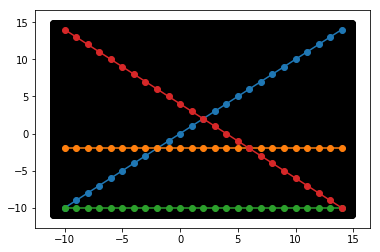

In [10]:
my_grid = []
grid_size = 26
grid_density = 10
grid_y = np.arange(-11, grid_size-11,1/grid_density)
grid_x = np.arange(-11, grid_size-11,1/grid_density)

i=0
while i < len(grid_y):
    j=0
    while j < len(grid_x):
        my_grid.append((grid_x[i] , grid_y[j]))
        j=j+1
    
    i=i+1
    
    
grid_y = []
grid_x = []      
i=0
while i < len(my_grid):
    grid_y.append(my_grid[i][1])
    grid_x.append(my_grid[i][0])
    i=i+1


y1 = np.arange(-10, 15)
y2 = np.arange(-10, 15)
y3 = np.arange(-10, 15)
y4 = np.arange(-10, 15)

x1 = [f1(x) for x in y1]
x2 = [f2(x) for x in y2]
x3 = [f3(x) for x in y3]
x4 = [f4(x) for x in y4]

plt.plot(y1, x1, '-o')
plt.plot(y2, x2, '-o')
plt.plot(y3, x3, '-o')
plt.plot(y4, x4, '-o')
plt.scatter(grid_x, grid_y, color = 'black')
plt.show()

In [11]:
nodes_inside = []
i = 0
while i < len(my_grid):
    if(check_point(my_grid[i][1], my_grid[i][0]) == 1):
        nodes_inside.append(my_grid[i])
    i=i+1

In [12]:
def count_area(nodes):
    S=0
    i=0
    row_len = grid_size*grid_density
    while i < len(my_grid)-row_len:
        j=i
        while j < i+row_len-1:
            nodes_inside = 0
            if(check_point(my_grid[j][1], my_grid[j][0]) == 1):
                nodes_inside=nodes_inside+1
            if(check_point(my_grid[j+1][1], my_grid[j+1][0]) == 1):
                nodes_inside=nodes_inside+1
            if(check_point(my_grid[j+row_len][1], my_grid[j+row_len][0]) == 1):
                nodes_inside=nodes_inside+1
            if(check_point(my_grid[j+row_len+1][1], my_grid[j+grid_size+1][0]) == 1):
                nodes_inside=nodes_inside+1
                
            if(nodes_inside == 4):
                S=S+1
            if(nodes_inside == 1 or nodes_inside == 2 or nodes_inside == 3):
                S=S+(1/2)
            j=j+1
        i=i+row_len

    return S/grid_density**2

In [13]:
count_area(my_grid)
#Must be 16

16.2

Вопросы:

1) Как задавать уравнения?

2) Как проверять попадание точки сетки в область решения? Можно ли решить задачу, не записав самому, какой должна быть разность y - f(x) для каждой кривой?

3) Каким образом считать объём для n>=4? Это очень затратно по ресурсам, например.

4) Как находить истинный объём при n>=4? (То есть за объём считать количество n-мерных кубов, поместившихся в область?)

